<a href="https://colab.research.google.com/github/piusAI/DeepLearning_Basic/blob/main/Labs_04_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Gradient

<ipython-input-10-f4dabd941e48>:56: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


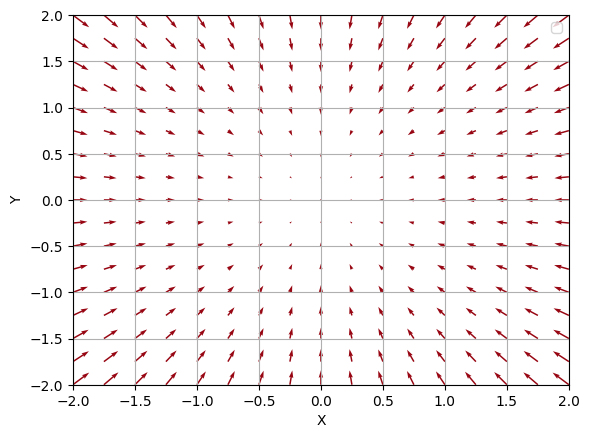

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

def _numerical_gradient_no_batch(f,x):
  h=1e-4
  grad = np.zeros_like(x)
  for idx in range(x.size):
    temp_val = x[idx]

    x[idx]= float(temp_val)+h
    fxh1= f(x)

    x[idx]=temp_val-h
    fxh2= f(x)

    grad[idx]= (fxh1-fxh2) / (2 * h)
    x[idx]=temp_val
  return grad
def numerical_gradient(f,X):
  if X.ndim==1:
    return _numerical_gradient_no_batch(f,X)
  else:
    grad = np.zeros_like(X)
    for idx, x in enumerate(X):
      grad[idx] = _numerical_gradient_no_batch(f,x)
    return grad

def function02(x):
  if x.ndim == 1:
    return np.sum(x**2)
  else :
    return np.sum(x**2, axis=1)
def tangent_line(f,x):
  d = numerical_gradient(f,x)
  C = - d * x + f(x)
  return lambda t: t*d +C

if __name__ =="__main__" :
  x0 = np.arange(-2.5, 2.5, 0.25)
  x1 = np.arange(-2.5, 2.5, 0.25)
  X,Y = np.meshgrid(x0,x1)

  X= X.flatten()
  Y= Y.flatten()
  grad = numerical_gradient(function02, np.c_[X,Y])
  plt.quiver(X,Y, -grad[:,0], -grad[:,1], angles = "xy", color= "#970612")
  plt.xlim([-2,2])
  plt.ylim([-2,2])

  plt.xlabel("X")
  plt.ylabel("Y")

  plt.grid()
  plt.legend()
  plt.draw()
  plt.show()

<<Review 01>>

01 np.c_[X,Y]

02 np.quiver(X,Y , grad[:,0]

[-2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.    2.25]
[-2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.    2.25]



<ipython-input-53-9e5e6e19d75c>:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


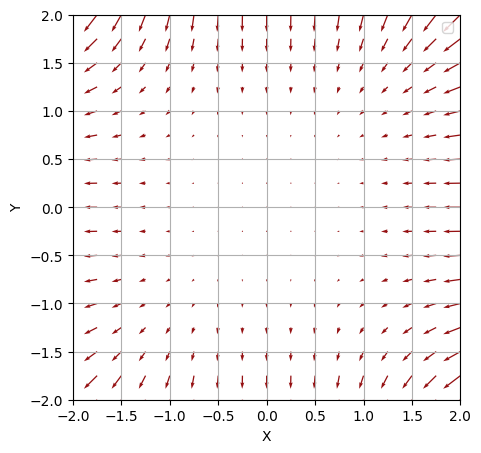

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def function03(x):
  if x.ndim ==1:
    return np.sum(x**3)
  else:
    return np.sum(x**3,axis=1)

# print(X)
# print(str(Y) +"\n")

X = np.arange(-2,2.5, 0.25)
Y = np.arange(-2,2.5, 0.25)

X,Y= np.meshgrid(X,Y)

X = X.flatten()
Y = Y.flatten()

gradi= numerical_gradient(function03, np.c_[X,Y])

plt.figure(figsize=(5,5))
plt.quiver(X,Y,-gradi[:,0],-gradi[:,1],angles="xy",color='#951012')
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.legend()
plt.draw()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

X=np.arange(0,5,0.25)
Y=np.arange(0,5,0.25)
X,Y = np.meshgrid(X,Y)
X=X.flatten()
Y=Y.flatten()

# print(X)
# print(X[:,1], X[:,0] , "\n")

print(X.shape)

grady=numerical_gradient(function02,np.c_[X,Y])
print(grady.shape)

grady2 = numerical_gradient( function03, np.array([X,Y]) )
print(grady2.shape)

# plt.figure(figsize=(5,5))
# plt.quiver(X,Y,-grady[:,0],-grady[:,1],angles="xy",color='#951012')
# plt.xlim([0,5])
# plt.ylim([0,5])
# plt.xlabel("X")
# plt.ylabel("Y")
# plt.grid()


# plt.draw()
# plt.show()


(400,)
(400, 2)
(2, 400)


##np.c_[X,Y] vs np.array([X,Y])

In [ ]:
import numpy as np

X= np.arange(0,4,0.5)
Y= np.arange(10,14,0.5)

print(np.c_[X,Y])
print(np.array([X,Y]))



[[ 0.  10. ]
 [ 0.5 10.5]
 [ 1.  11. ]
 [ 1.5 11.5]
 [ 2.  12. ]
 [ 2.5 12.5]
 [ 3.  13. ]
 [ 3.5 13.5]]
[[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5]
 [10.  10.5 11.  11.5 12.  12.5 13.  13.5]]


###About Gradient x,y



> np.c_[ ] 를 활용하면 Column 으로써 활용 :

↪ [[x0,y0], [x1,y1], ... , [xn,yn]]
- grad[:,0] => gradient, X
- grad[:.1] => gradient, Y



---


> np.array( ) 를 활용하면 Rows 로써 활용 :

↪ [[x0, x1, ... , xn], [y0, y1, ... , yn]]
- grad(0) => gradient, X
- grad(1) => gradient, Y

##Last Gradient . 05.22


<ipython-input-5-f38984bc2d01>:62: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


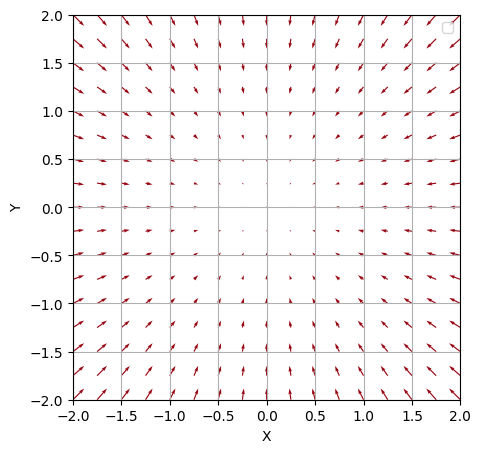

In [5]:



import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def __numerical_gradient_no_batch(f,x):
  h = 1e-4
  grad= np.zeros_like(x)
  for idx in range(x.size):
    tmp_val=x[idx]

    x[idx] = float(tmp_val) + h
    fxh1 = f(x)

    x[idx] = tmp_val - h
    fxh2 = f(x)

    grad[idx] = (fxh1 - fxh2) / (2 * h)
    x[idx] = tmp_val
  return grad

def numerical_gradient(f,X):
  if X.ndim==1:
    return __numerical_gradient_no_batch(f,X)
  else :
    grad = np.zeros_like(X)
    for idx, x in enumerate(X):
      grad[idx] = __numerical_gradient_no_batch(f,x)
    return grad

def function_j(x):
  if x.ndim == 1:
    y= np.sum(x**2)
  else :
    y= np.sum(x**2, axis=1)
  return y
def tangent_line(f,x):
  d = numerical_gradient(f,x)
  C = d * x + f(x)
  return lambda t: t * d + C

x0 = np.arange(-2.5, 2.5, 0.25)
x1 = np.arange(-2.5, 2.5, 0.25)

X,Y = np.meshgrid(x0,x1)
X = X.flatten()
Y = Y.flatten()

grad = numerical_gradient(function_j, np.c_[X,Y])
plt.figure(figsize=(5,5))
plt.quiver(X,Y, -grad[:,0], -grad[:,1], angles="xy", color = "#970612")
plt.xlim([-2,2])
plt.ylim([-2,2])

plt.xlabel('X')
plt.ylabel('Y')

plt.legend()
plt.grid()

plt.draw()
plt.show()

## Axes 3D

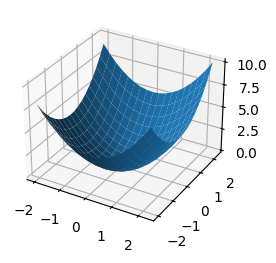

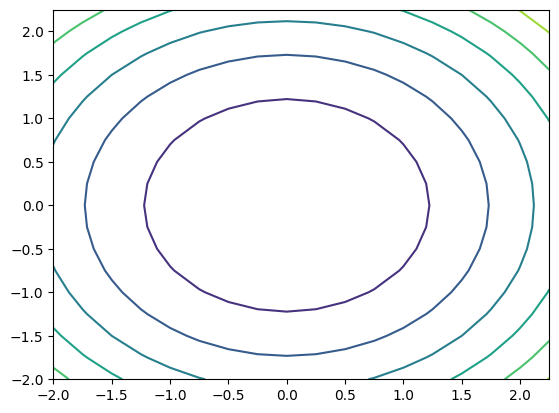

In [35]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

X = np.arange(-2, 2.5, 0.25)
Y = np.arange(-2, 2.5, 0.25)
X,Y = np.meshgrid(X,Y)

Z = X**2 + Y**2

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# ax=plt.subplot(projection='3d')

ax = plt.figure().add_subplot(122,projection='3d')
ax.plot_surface(X,Y,Z)

plt.show()
plt.contour(X,Y,Z)
plt.show()

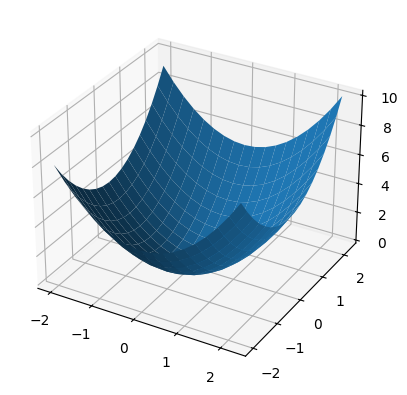

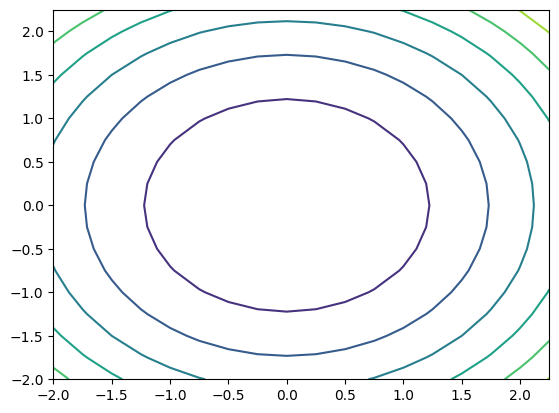

In [37]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

X = np.arange(-2,2.5,0.25)
Y = np.arange(-2,2.5,0.25)

X,Y =np.meshgrid(X,Y)
Z= X**2+ Y**2
ax=plt.figure().add_subplot(111,projection='3d')
ax.plot_surface(X,Y,Z)
plt.show()
plt.contour(X,Y,Z)